In [13]:
%run ./packer.ipynb

In [14]:
packer = Packer()

packer.add_bin(Bin('Auto', 70,100,60, 100))

packer.add_item(Item('Kiste', 62, 35, 38, 1))
packer.add_item(Item('Kiste', 62, 35, 38, 1))
packer.add_item(Item('Kiste', 62, 35, 38, 1))
packer.add_item(Item('Kiste', 62, 35, 38, 1))
packer.add_item(Item('PC-Kiste', 51,36,48, 1))
packer.add_item(Item('Wäschekorb', 49,29,27, 1))
packer.add_item(Item('Werkzeugbox', 39,19,18, 1))
packer.add_item(Item('Ikea Tüte', 40,24,18, 1))
packer.add_item(Item('Longboard', 107,27,12, 1))

In [15]:
packer.pack()


::::::::::: Auto(70.000x100.000x60.000, max_weight:100.000) vol(420000.000) item_number(5) filling_ratio(0.675)
FITTED ITEMS:
====>  PC-Kiste(51.000x36.000x48.000, weight: 1.000) pos([0, 0, 0]) rt(2) vol(88128.000)
====>  Kiste(62.000x35.000x38.000, weight: 1.000) pos([0, Decimal('36.000'), 0]) rt(4) vol(82460.000)
====>  Kiste(62.000x35.000x38.000, weight: 1.000) pos([Decimal('35.000'), Decimal('36.000'), 0]) rt(4) vol(82460.000)
====>  Ikea Tüte(40.000x24.000x18.000, weight: 1.000) pos([0, Decimal('36.000'), Decimal('38.000')]) rt(4) vol(17280.000)
====>  Werkzeugbox(39.000x19.000x18.000, weight: 1.000) pos([Decimal('24.000'), Decimal('36.000'), Decimal('38.000')]) rt(5) vol(13338.000)

UNFITTED ITEMS:
====>  Kiste(62.000x35.000x38.000, weight: 1.000) pos([Decimal('35.000'), Decimal('36.000'), Decimal('38.000')]) rt(5) vol(82460.000)
====>  Kiste(62.000x35.000x38.000, weight: 1.000) pos([Decimal('35.000'), Decimal('36.000'), Decimal('38.000')]) rt(5) vol(82460.000)
====>  Wäschekorb

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def set_axes_equal(ax,xmax,ymax,zmax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    #x_limits = ax.get_xlim3d()
    #y_limits = ax.get_ylim3d()
    #z_limits = ax.get_zlim3d()
    x_limits = (0,xmax)
    y_limits = (0,ymax)
    z_limits = (0,zmax)

    print(x_limits,y_limits,z_limits)

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])
    print(x_middle,plot_radius)

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [17]:
colormap = {
    "Kiste":[125, 79, 6],
    "PC-Kiste":[0,0,0],
    "Wäschekorb":[100,100,100],
    "Werkzeugbox":[222, 222, 0],
    "Ikea Tüte":[0,0,255],
    "Longboard":[219, 170, 9]
}

::::::::::: Auto(70.000x100.000x60.000, max_weight:100.000) vol(420000.000) item_number(5) filling_ratio(0.675)
FITTED ITEMS:
[0, 0, 0]
====>  PC-Kiste(51.000x36.000x48.000, weight: 1.000) pos([0, 0, 0]) rt(2) vol(88128.000)
[0, Decimal('36.000'), 0]
====>  Kiste(62.000x35.000x38.000, weight: 1.000) pos([0, Decimal('36.000'), 0]) rt(4) vol(82460.000)
[Decimal('35.000'), Decimal('36.000'), 0]
====>  Kiste(62.000x35.000x38.000, weight: 1.000) pos([Decimal('35.000'), Decimal('36.000'), 0]) rt(4) vol(82460.000)
[0, Decimal('36.000'), Decimal('38.000')]
====>  Ikea Tüte(40.000x24.000x18.000, weight: 1.000) pos([0, Decimal('36.000'), Decimal('38.000')]) rt(4) vol(17280.000)
[Decimal('24.000'), Decimal('36.000'), Decimal('38.000')]
====>  Werkzeugbox(39.000x19.000x18.000, weight: 1.000) pos([Decimal('24.000'), Decimal('36.000'), Decimal('38.000')]) rt(5) vol(13338.000)
UNFITTED ITEMS:
====>  Kiste(62.000x35.000x38.000, weight: 1.000) pos([Decimal('35.000'), Decimal('36.000'), Decimal('38.000'

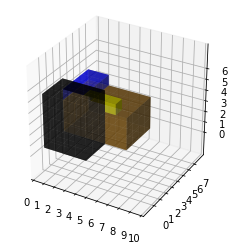

***************************************************
***************************************************


In [18]:
divo = 10

for b in packer.bins:
    volsum = 0
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1.0, 1.0, 1.0])
    axes = np.array([int(b.width), int(b.length),int(b.height)],dtype=int)//divo
    ax.set_xticks(np.arange(0,axes[0]+1,1))
    ax.set_yticks(np.arange(0,axes[1]+1,1))
    ax.set_zticks(np.arange(0,axes[2]+1,1))
    data = np.zeros(axes, dtype=bool)
    colors = np.zeros(axes.tolist() + [4], dtype=np.float32)

    print(":::::::::::", b.string())

    print("FITTED ITEMS:")
    for item in b.items:
        volsum += item.get_volume()
        dim = np.array(item.get_dimension(),dtype=int)//divo
        p = np.array(item.position,dtype=int)//divo
        colors[int(p[0]):int(dim[0]+p[0]),int(p[1]):int(dim[1]+p[1]),int(p[2]):int(dim[2]+p[2]),:] = np.array(colormap[item.name]+[160])/255
        data[int(p[0]):int(dim[0]+p[0]),int(p[1]):int(dim[1]+p[1]),int(p[2]):int(dim[2]+p[2])] = True
        print(item.position)
        print("====> ", item.string())

    print("UNFITTED ITEMS:")
    for item in b.unfitted_items:
        print("====> ", item.string())
    ax.voxels(data, facecolors=colors)
    set_axes_equal(ax,*axes)
    print("Container volume:",b.get_volume())
    print("Items volume:",volsum)
    plt.show()
    print("***************************************************")
    print("***************************************************")